In [1]:
from mtcnn import MTCNN
import cv2 as cv
import matplotlib.pyplot as plt
import time
import os
import pandas as pd


In [2]:
times = []
bboxes = []

base_path = "./dataset/dataset_augmented/test/images"
images = os.listdir(base_path)

for idx, img in enumerate(images):
    image = cv.imread(os.path.join(base_path, img))
    detector = MTCNN()

    start = time.time()
    faces = detector.detect_faces(image)
    end = time.time()

    times.append(end - start)
    print("[INFO] {:.6f} for image".format(end - start) + f" {idx + 1}/{len(images)}")

    bboxes.append([face['box'] for face in faces])

[INFO] 0.508000 for image 1/790
[INFO] 0.474502 for image 2/790
[INFO] 0.465001 for image 3/790
[INFO] 0.468499 for image 4/790
[INFO] 0.459001 for image 5/790
[INFO] 0.551001 for image 6/790
[INFO] 0.480955 for image 7/790
[INFO] 0.473500 for image 8/790
[INFO] 0.479001 for image 9/790
[INFO] 0.467999 for image 10/790
[INFO] 0.515001 for image 11/790
[INFO] 0.485001 for image 12/790
[INFO] 0.409001 for image 13/790
[INFO] 0.459999 for image 14/790
[INFO] 0.475003 for image 15/790
[INFO] 0.459500 for image 16/790
[INFO] 0.502001 for image 17/790
[INFO] 0.463000 for image 18/790
[INFO] 0.556000 for image 19/790
[INFO] 0.461000 for image 20/790
[INFO] 0.523000 for image 21/790
[INFO] 0.490500 for image 22/790
[INFO] 0.457501 for image 23/790
[INFO] 0.477001 for image 24/790
[INFO] 0.453001 for image 25/790
[INFO] 0.471500 for image 26/790
[INFO] 0.455001 for image 27/790
[INFO] 0.499001 for image 28/790
[INFO] 0.833500 for image 29/790
[INFO] 0.458000 for image 30/790
[INFO] 0.475001 for

In [3]:
import pandas as pd
import numpy as np

p_images = []
p_times = []
p_x1 = []
p_y1 = []
p_x2 = []
p_y2 = []

for p_image, p_time, p_bbox in zip(images, times, bboxes):

    # No Bbox
    if len(p_bbox) == 0:
        p_images.append(p_image)
        p_times.append(p_time)

        p_x1.append(np.NAN)
        p_y1.append(np.NAN)
        p_x2.append(np.NAN)
        p_y2.append(np.NAN)

    # Bbox
    for box in p_bbox:
        # TODO :: Adjust format (x1, y1, ?, ?)
        p_images.append(p_image)
        p_times.append(p_time)

        p_x1.append(box[0])
        p_y1.append(box[1])
        p_x2.append(box[0] + box[2])
        p_y2.append(box[1] + box[3])

df = pd.DataFrame(list(zip(p_images, p_times, p_x1, p_y1, p_x2, p_y2)), columns=[
                  "Image", "Time", "X1", "Y1", "X2", "Y2"])
df

,Image,Time,X1,Y1,X2,Y2
0,1001_jpg.rf.b7c44a27e79dbc4de661327ba01c1edd.jpg,0.508000,224.0,222.0,452.0,519.0
1,1005_jpg.rf.bb3f3203348f9e88224f7467ef52843c.jpg,0.474502,263.0,165.0,479.0,430.0
2,1005_jpg.rf.bb3f3203348f9e88224f7467ef52843c.jpg,0.474502,143.0,117.0,187.0,176.0
3,1014_jpg.rf.c539a1eadeef2d13f1bf7d0f7b5c254c.jpg,0.465001,173.0,155.0,336.0,385.0
4,1061_jpg.rf.44dd02d8bd98efc8deac4f6fbc60ef99.jpg,0.468499,194.0,68.0,276.0,186.0
...,...,...,...,...,...,...
1077,985_jpg.rf.9277df9a3b6c30be5d85b888f18bb41f.jpg,0.511500,334.0,447.0,405.0,534.0
1078,986_jpg.rf.6f8ff4f13b76e435399fe4d604c285b3.jpg,0.468001,259.0,179.0,481.0,475.0
1079,987_jpg.rf.dff0e90c55a7621864aee639fd482d98.jpg,0.458000,228.0,155.0,291.0,253.0
1080,98_jpg.rf.c929bd3c5be065cfdc29dfe04ff72d87.jpg,0.454000,NaN,NaN,NaN,NaN


1148_jpg.rf.02b4f42bf07950906637f830582e835b.jpg
190 129 410 381


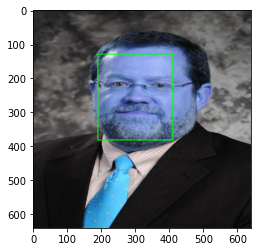

In [4]:
image_names = np.unique(df.Image)
current_entry = image_names[8] # "1_jpg.rf.e3e0a48dd72710db0188e9c100a49f5f.jpg" # 
print(current_entry)

current_df = df[df['Image'] == current_entry]

# Read image from your local file system
testImage = cv.imread(os.path.join(base_path, current_entry))

for df_idx, row in current_df.iterrows():
    if np.isnan(row['X1']):
        continue

    x1 = int(row['X1'])
    y1 = int(row['Y1'])
    x2 = int(row['X2'])
    y2 = int(row['Y2'])

    print(x1, y1, x2, y2)

    cv.rectangle(
        testImage,
        (x1, y1),
        (x2, y2),
        (0, 255, 0),
        2
    )

plt.figure(figsize=(4, 4))
plt.imshow(testImage)
plt.show()


In [5]:
model_name = "MTCNN"

folder_path = f"./test_results/{model_name}"
os.mkdir(folder_path)

results_path = f"./test_results/{model_name}.xlsx"


df.to_excel(results_path, index=False)